# Introduction to Simple Linear Regression: Evaluation

## Learning Objectives and outcomes

- $R^{2}$ - score for a linear regression

- Discussion of statsmodel output for a linear regression.

- Assumptions of linear regression

- Interpretting significance and p_values.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read data to a dataframe
data = pd.read_csv('data/Advertising.csv', index_col=0)[['TV', 'Sales']]

print(data.shape)
data.head()

(200, 2)


,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


## (From this morning) Linear Regression with `statsmodels`

There is another library that we can use for linear models which is `statsmodels`.  `statsmodels` is much more robust than `sklearn` for linear models, but is much less extensible.

- [check the documentation](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

- Now let's use statsmodel to fit a linear model to our data.

In [3]:
import statsmodels.api as sm

__Your Turn__

- Try to use statsmodel library to fit a line to the advertising dataset.

In [2]:
data

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
...,...,...
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8
199,283.6,25.5


In [39]:
X = data[['TV']].values
y = data.Sales.values

In [40]:
X.shape

(200, 1)

In [16]:
model = sm.OLS(y, X, hasconst=False)

In [17]:
results = model.fit()

In [18]:
results.params

array([0.08324961])

In [22]:
results.predict([150, 2, 3])

array([12.48744131,  0.16649922,  0.24974883])

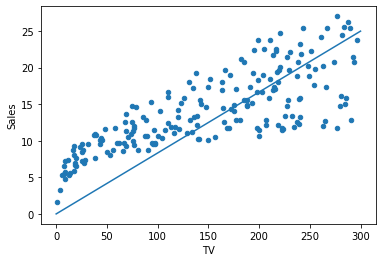

In [24]:
data.plot(x='TV', y='Sales', kind='scatter')
x_pred = np.linspace(0, 300, 300)
plt.plot(x_pred, results.predict(x_pred))

In [30]:
data['ones'] = 1
data[['ones', 'TV']].values

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [26]:
X = sm.add_constant(X)
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [31]:
model = sm.OLS(y, X, hasconst=True)
results = model.fit()
results.params

array([7.03259355, 0.04753664])

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        13:53:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
lr.coef_

array([7.03259355, 0.04753664])

## Understanding $R^{2}$

Note that if we want to predict sales naively a good choice could be the means sales.

In [41]:
X = X.reshape(-1)

In [42]:
X.shape

(200,)

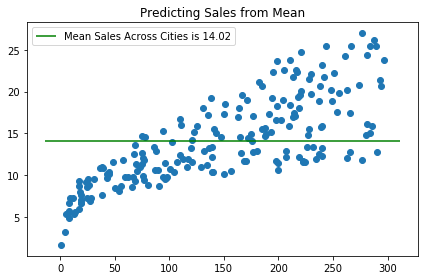

In [43]:
plt.scatter(X, y)
xmin, xmax = plt.xlim()

plt.hlines(y=y.mean(),
           xmin=xmin, xmax=xmax,
           label='Mean Sales Across Cities is %.2f' % y.mean(), color='green')

plt.title('Predicting Sales from Mean')

plt.legend()

plt.tight_layout()

But as we can see this is not explaining what is going on in the data very well. We know this amount of errors as Total Sum of Squares.


$$ \text{Total Sum of Squares} = \sum\limits_{i=1}^{200} (y_{i} - \bar{y})^{2} $$

In [44]:
y_bar = y.mean()

TSS = sum((y - y_bar)**2)

print(TSS)

5417.148749999997


But after we fit a linear regression line we have a better fit than just "mean"

In [45]:
y_pred = results.predict(sm.add_constant(X))

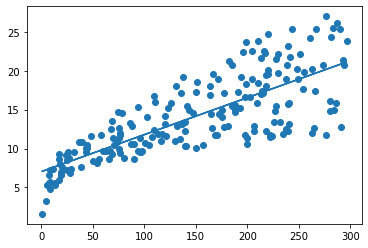

In [47]:
# this plots the actual data.
plt.scatter(X, y)

# this plots the 'best' line
plt.plot(X, y_pred)

As we can see this line is also not 'perfect' from prediction point of view. Let's see how much is the total amount of error this time.

$$ \text{Squared Sum of Residuals} = \sum\limits_{i=1}^{200} (y_i - \text{y_pred}_{i})^{2}$$

In [48]:
residuals = y - y_pred

## We will be 
RSS = sum(residuals**2)

RSS

2102.530583131351

In [49]:
print('Total Squared Sum  is %.3f '%TSS)
print('Residual Squared Sum is %.3f'%RSS)

Total Squared Sum  is 5417.149 
Residual Squared Sum is 2102.531


$R^{2}$ measurement is just their ratio:

 $$ R^{2} = \frac{TSS - RSS}{TSS} $$

In [50]:
R_squared = (TSS - RSS)/TSS

R_squared

0.6118750508500709

## Using `statsmodels.api`  - $R^2$ and Making Predictions

In [55]:
X = data.drop(columns='Sales')
X['intercept'] = 1
y = data.Sales

In [56]:
# we first construct our model
model = sm.OLS(y, X, hasconst=True)

# by fitting we learn 'best' coefficients for intercept and slope
fitted_model = model.fit()


# with summary method we can see all the relevant statistics.
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        14:21:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.000       0.042       0.053
ones           7.0326      0.458     15.360      0.000       6.130       7.935
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
results.params

array([7.03259355, 0.04753664])

Suppose our company wants to invest $230K in TV ads in a city, how much sales would you expect on average for this city?

In [59]:
fitted_model.predict([230, 1])

array([17.96602085])

In [62]:
intercept = fitted_model.params[1]

slope = fitted_model.params[0]

Note that this prediction is noting but 

$$ \text{Sales} = 0.0475 \times 230 + 7.0326 $$

In [64]:
our_prediction = slope * 230 + intercept * 1
our_prediction

17.966020848722238

In [65]:
results.rsquared

0.611875050850071

## Now with `sklearn`

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr = LinearRegression()

In [69]:
lr.fit(X.drop(columns='ones'), y)

LinearRegression()

In [70]:
# best slope value slope
m = lr.coef_

In [71]:
m

array([0.04753664])

In [73]:
## best intercept value
b = lr.intercept_
b

7.032593549127695

In [79]:
y_pred = m*X.drop(columns='ones') + b
y_pred = lr.predict(X.drop(columns='ones'))

In [80]:
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

Text(0, 0.5, 'Sales in thosands of units')

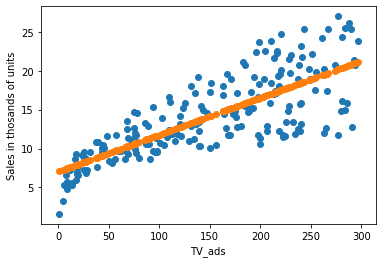

In [81]:
plt.scatter(X.drop(columns='ones'), y)
plt.scatter(X.drop(columns='ones'), y_pred)

plt.xlabel('TV_ads')

plt.ylabel('Sales in thosands of units')

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y, y_pred)

0.611875050850071

## P values and Significance

- To clarify the difference between population parameters and the estimates from data we will work with simulated data in this section.

In [84]:
# Here we will work with a toy case
# note that y ≈ 3X + 5 so we know population parameters in this case.
# irr_error is random error due to some measurement errors.

X = np.random.uniform(low=0, high=10, size=100)
irr_error = np.random.normal(loc=0, scale=1, size=100)

y = 3*X + 5 + irr_error

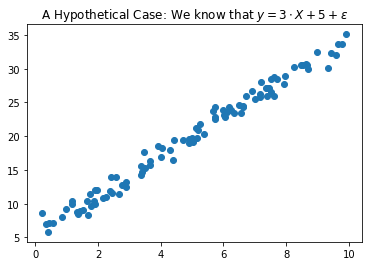

In [85]:
plt.scatter(X,y)
plt.title('A Hypothetical Case: We know that $y = 3 \cdot X + 5 + \epsilon$')
plt.show()

__Your Turn!__ Use sklearn to fit 100 linear models for the data X, y above. Don't forget to add random error each time. The idea is each time we sample from a population we will have some variation inevitably.

In [100]:
coef_list_b0 = []
coef_list_b1 = []
for i in range(1000):
    X = np.random.uniform(low=0, high=10, size=100)
    irr_error = np.random.normal(loc=0, scale=1, size=100)
    y = 3*X + 5 + irr_error
    X = X.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(X, y)
    coef_list_b0.append(lr.intercept_)
    coef_list_b1.append(lr.coef_[0])

In [101]:
len(coef_list_b1)

1000

In [102]:
coef_list_b1[:10]

[3.0610822952008037,
 3.008435775397851,
 2.9648511971013236,
 2.9887997610240267,
 3.0113911175668036,
 3.0061178275638203,
 3.040872302607764,
 3.0221686769702254,
 3.053788046001197,
 2.940245912330287]

Now let's look at distributions of $\hat{b}_{0}$ and $\hat{b}_{1}$:

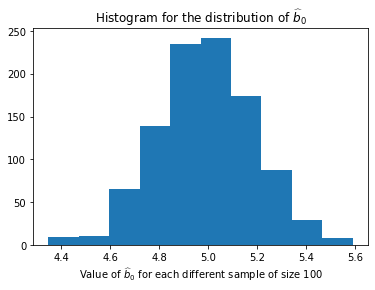

In [103]:
plt.hist(coef_list_b0)
plt.title("Histogram for the distribution of $\widehat{b}_{0}$")
plt.xlabel("Value of $\widehat{b}_{0}$ for each different sample of size 100")
plt.show()

In [104]:
np.mean(coef_list_b0)

4.99071784742465

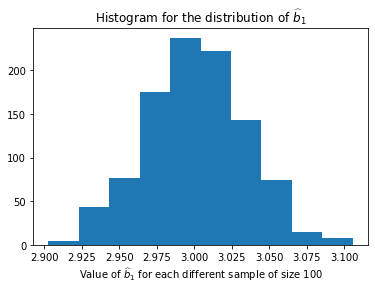

In [105]:
plt.hist(coef_list_b1)
plt.title("Histogram for the distribution of $\widehat{b}_{1}$")
plt.xlabel("Value of $\widehat{b}_{1}$ for each different sample of size 100")
plt.show()

In [106]:
np.mean(coef_list_b1)

3.0012645073437088

## Further Reading <a name='further_reading'></a>

- [What is the parameter copy_X in sklearn](https://stackoverflow.com/questions/52541717/what-is-the-parameter-copy-x-in-sklearn-linear-regression)

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf